In [2]:
# Importing the libraries
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import validation_curve
# Importing the dataset
dataset = pd.read_csv('extracted_features.csv')
#dataset = dataset.sample(frac=1).reset_index(drop=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4620].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from time import time
t0 = time()
# Fitting LogReg to the Training set
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(random_state=0)
#logreg.fit(X_train, y_train)
# Fitting RF to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400, criterion = "gini")
rf.fit(X_train, y_train)
# Fitting knn to the Training set
#from sklearn.neighbors import KNeighborsClassifier  
#knn = KNeighborsClassifier(n_neighbors=3, p=3)  
#knn.fit(X_train, y_train)
# Fitting svm to the Training set
from sklearn.svm import SVC 
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train) 
#y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
#y_pred_knn = knn.predict(X_test)
ensemble=[]


for i in range(0,181):
    vote =  y_pred_rf[i] + y_pred_svm[i] 
    if vote>=2:
        ensemble.append(1)
    else: ensemble.append(0)

t1 = time()
print ('Run time =',(t1-t0))



Run time = 28.461636781692505


y_pred = y_pred_logreg
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
sen=tp/(tp+fn)
print ('\nSensitivity =', sen)
spec= tn/(tn+fp)
print ('\nSpecificity =', spec)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print ('\nAccuracy =', accuracy,'\n')
print ("Model = Logistic Regression")
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report')
target_names = ['Glaucomatous', 'Normal']
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

[[109   9]
 [ 26  37]]

Sensitivity = 0.6349206349206349

Specificity = 0.9322033898305084

Accuracy = 0.8287292817679558 

Model = Random Forest

Precision= 0.8333333333333334

Classification Report
              precision    recall  f1-score   support

Glaucomatous       0.81      0.92      0.86       118
      Normal       0.80      0.59      0.68        63

    accuracy                           0.81       181
   macro avg       0.81      0.76      0.77       181
weighted avg       0.81      0.81      0.80       181



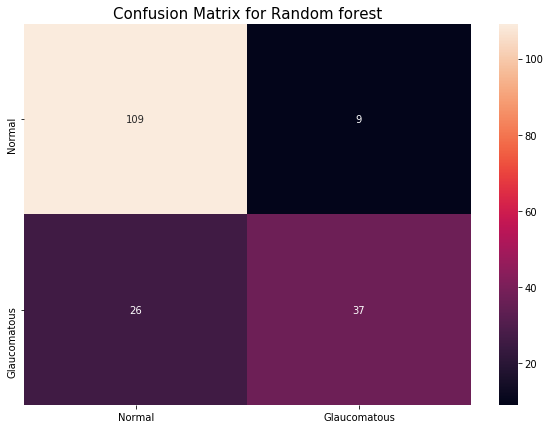

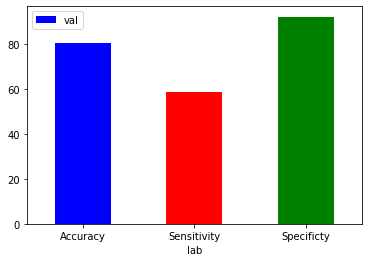

In [10]:
y_pred = y_pred_rf
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = ["Normal","Glaucomatous"], columns = ["Normal","Glaucomatous"])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.3g').set_title('Confusion Matrix for Random forest',fontsize=15)


tn, fp, fn, tp = cm.ravel()
sen_r=tp/(tp+fn)
print ('\nSensitivity =', sen)
spec_r= tn/(tn+fp)
print ('\nSpecificity =', spec)
accuracy_r = (tp+tn)/(tp+tn+fp+fn)
print ('\nAccuracy =', accuracy,'\n')
print ("Model = Random Forest")
pres_r=tp/(tp+fp)
print('\nPrecision=',pres)
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report')
target_names = ['Glaucomatous', 'Normal']
print(classification_report(y_test, y_pred_rf, target_names=target_names))
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[accuracy_r*100,sen_r*100,spec_r*100]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])


[[110   8]
 [ 23  40]]

Sensitivity = 0.6349206349206349

Specificity = 0.9322033898305084

Accuracy = 0.8287292817679558 

Model = SVM

Precision= 0.8333333333333334

Classification Report
              precision    recall  f1-score   support

Glaucomatous       0.83      0.93      0.88       118
      Normal       0.83      0.63      0.72        63

    accuracy                           0.83       181
   macro avg       0.83      0.78      0.80       181
weighted avg       0.83      0.83      0.82       181



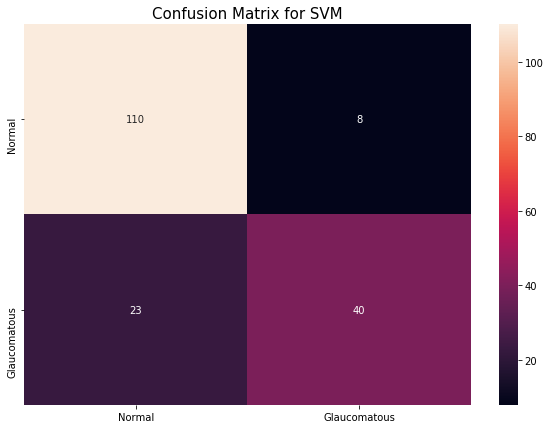

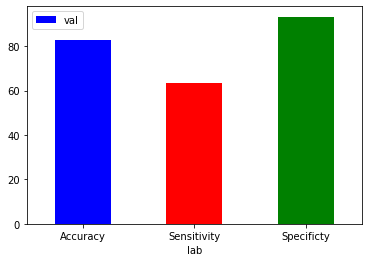

In [11]:
y_pred = y_pred_svm
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = ["Normal","Glaucomatous"], columns = ["Normal","Glaucomatous"])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.3g').set_title('Confusion Matrix for SVM',fontsize=15)

tn, fp, fn, tp = cm.ravel()
sen_s=tp/(tp+fn)
print ('\nSensitivity =', sen)
spec_s= tn/(tn+fp)
print ('\nSpecificity =', spec)
accuracy_s = (tp+tn)/(tp+tn+fp+fn)
print ('\nAccuracy =', accuracy,'\n')
print ("Model = SVM")
pres_s=tp/(tp+fp)
print('\nPrecision=',pres)
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report')
target_names = ['Glaucomatous', 'Normal']
print(classification_report(y_test, y_pred_svm, target_names=target_names))
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[accuracy_s*100,sen_s*100,spec_s*100]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])


y_pred = y_pred_knn

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
array=[[tn,fn],[fp,tp]]
df_cm = pd.DataFrame(array, index = ["Normal","Glaucomatous"], columns = ["Normal","Glaucomatous"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.3g').set_title('Confusion Matrix for Ensemble Learning',fontsize=15)
sen=tp/(tp+fn)
print ('\nSensitivity =', sen)
spec= tn/(tn+fp)
print ('\nSpecificity =', spec)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print ('\nAccuracy =', accuracy,'\n')
print ("Model = KNN")
pres=tp/(tp+fp)
print('\nPrecision=',pres)
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report')
target_names = ['Glaucomatous', 'Normal']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Model= ensemble

Sensitivity = 0.6349206349206349

Specificity = 0.9322033898305084

Accuracy = 0.8287292817679558

Precision= 0.8333333333333334

Classification Report
              precision    recall  f1-score   support

Glaucomatous       0.80      0.97      0.88       118
      Normal       0.92      0.54      0.68        63

    accuracy                           0.82       181
   macro avg       0.86      0.76      0.78       181
weighted avg       0.84      0.82      0.81       181

[[115   3]
 [ 29  34]]


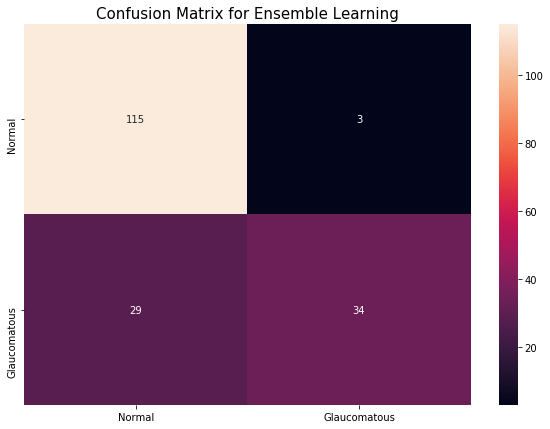

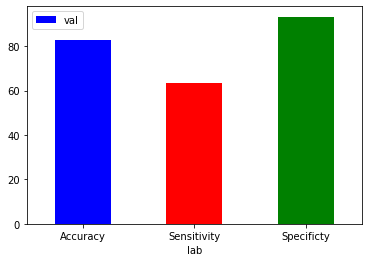

In [12]:
print ("Model= ensemble")
tn, fp, fn, tp = cm.ravel()
sen_e=tp/(tp+fn)
print ('\nSensitivity =', sen)
spec_e= tn/(tn+fp)
print ('\nSpecificity =', spec)
accuracy_e= (tp+tn)/(tp+tn+fp+fn)
print ('\nAccuracy =', accuracy)
pres_e=tp/(tp+fp)
print('\nPrecision=',pres)
from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report')
target_names = ['Glaucomatous', 'Normal']
print(classification_report(y_test,ensemble, target_names=target_names))
cm = confusion_matrix(y_test, ensemble)
print(cm)
df_cm = pd.DataFrame(cm, index = ["Normal","Glaucomatous"], columns = ["Normal","Glaucomatous"])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.3g').set_title('Confusion Matrix for Ensemble Learning',fontsize=15)

df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[accuracy_e*100,sen_e*100,spec_e*100]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])


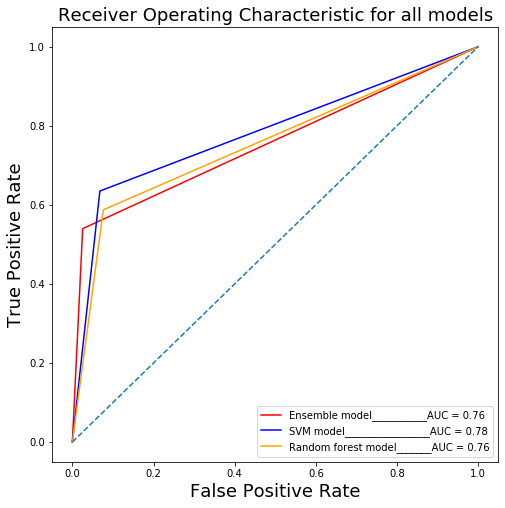

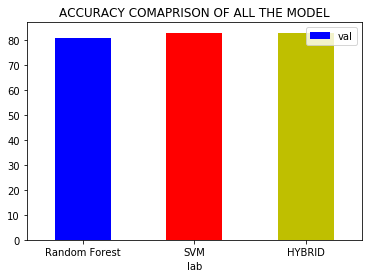

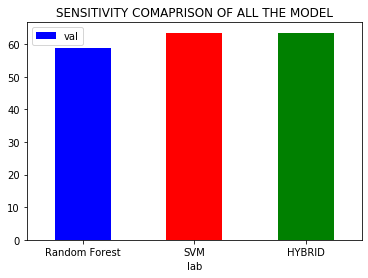

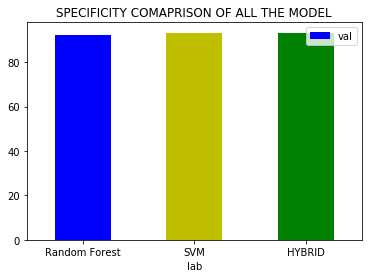

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


#array = [[101,13], 
#        [17,50]]




from sklearn.metrics import roc_curve, auc
false_positive_rate_en, true_positive_rate_en, thresholds_en = roc_curve(y_test, ensemble)
roc_auc_en = auc(false_positive_rate_en, true_positive_rate_en)

#false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
#roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

false_positive_rate_svm, true_positive_rate_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

#false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(y_test, y_pred_logreg)
#roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic for all models', fontsize=18)
plt.plot(false_positive_rate_en,true_positive_rate_en,   color='red',   label = 'Ensemble model___________AUC = %0.2f' % roc_auc_en)
#plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='green', label = 'Knn model_________________AUC = %0.2f' % roc_auc_knn)
plt.plot(false_positive_rate_svm,true_positive_rate_svm, color='blue',  label = 'SVM model_________________AUC = %0.2f' % roc_auc_svm)
plt.plot(false_positive_rate_rf,true_positive_rate_rf,   color='orange',label = 'Random forest model_______AUC = %0.2f' % roc_auc_rf)
#lt.plot(false_positive_rate_lr,true_positive_rate_lr,   color='pink',  label = 'Logistic regression model___AUC = %0.2f' % roc_auc_lr)



plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)

df = pd.DataFrame({'lab':['Random Forest', 'SVM', 'HYBRID'], 'val':[accuracy_r*100,accuracy_s*100,accuracy_e*100]}) #RF
ax = df.plot.bar(x='lab', y='val',title='ACCURACY COMAPRISON OF ALL THE MODEL' ,rot=0,color=['b', 'r', 'y'])

df = pd.DataFrame({'lab':['Random Forest', 'SVM', 'HYBRID'], 'val':[sen_r*100,sen_s*100,sen_e*100]}) #RF
ax = df.plot.bar(x='lab', y='val',title='SENSITIVITY COMAPRISON OF ALL THE MODEL' ,rot=0,color=['b', 'r', 'g'])

df = pd.DataFrame({'lab':['Random Forest', 'SVM', 'HYBRID'], 'val':[spec_r*100,spec_s*100,spec_e*100]}) #RF
ax = df.plot.bar(x='lab', y='val',title='SPECIFICITY COMAPRISON OF ALL THE MODEL' ,rot=0,color=['b', 'y', 'g'])


